# <a id='top'></a>🛳️ Survival Analysis of Titanic Passengers
**Author**: Jimena Pastrana Jessel  
**Date**: October 2024

---

## 🎯 Goal
To perform a detailed analysis of the Titanic dataset, visualize key insights, and document findings. The main goal is to generate a solution for the Kaggle begginers competition! This project includes:

- **Exploratory Data Analysis (EDA)**: Identifying patterns and relationships.
- **Data Visualization**: Creating meaningful charts and graphs.
- **Summary Report**: Documenting insights and conclusions.
- **Generate Submission**: Preparing predictions for the Kaggle submission.

---

## 📋 Table of Contents
1. [Introduction](#introduction)
2. [Data Overview](#data-overview)
3. [Data Cleaning](#data-cleaning)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
5. [Visualizations](#visualizations)
6. [Machine Learning Model - Logistic Regression](#machine)
7. [Generate Submission](#submission)
8. [Conclusions](#conclusions)
9. [Appendix](#appendix)

---

## <a id='introduction'></a>📖 Introduction
The Titanic dataset is a well-known dataset from Kaggle used in machine learning and data analysis. It contains information about passengers who were aboard the Titanic when it sank. The goal is to understand the factors that influenced the chances of survival.

**Key Questions**:
- What factors contributed to higher survival rates?
- How do demographics such as age, gender, and class affect survival?
- Are there any surprising patterns?

---

## 📊 Data Overview
In this section, we will explore the dataset to understand its structure and identify any missing data. Key steps include:

1. 📊 [**Displaying the first few rows of the dataset.**](#display)
2. 📊 [**Checking for missing values.**](#missing)
3. 📊 [**Summary statistics.**](#summaryStats)
4. 📊 [**Summary.**](#summary)

---

## 🧹 Data Cleaning
To ensure the data is suitable for analysis, we will perform the following cleaning steps:

1. 🧹 [**Handling Missing Data**](#handling): Filling or dropping missing values.
2. 🧹 [**Data Encoding**](#encoding): Converting categorical variables to numerical.
3. 🧹 [**Feature Engineering**](#fei): Creating new features.
4. 🧹 [**Summary**](#summaryCleaning): Creating new features.

---

## 🔍 Exploratory Data Analysis
Here, we’ll explore the data to identify patterns and trends. This section includes:

1. 🔍 [**Data distribution analysis.**](#disAn)
2. 🔍 [**Initial Survival Analysis.**](#observations)
3. 🔍 [**Correlations between variables.**](#corrVar)
4. 🔍 [**Summary.**](#summaryAnalysis)

---

## 📈 Visualizations
Visualizations provide a deeper understanding of the dataset. The following charts will be created:

1. 📈 [**Survival Rate by Age and Gender**](#rateAgeGender)
2. 📈 [**Survival Rate by Family Size**](#rateFam)
3. 📈 [**Fare Distribution by Class and Survival**](#fareDist)

---

## 🤖 Machine Learning Model - Logistic Regression
To predict wether a passenger survived the Titanic or not based on the available features. 

1. 🤖 [**Data Preparation**](#dataPre)
2. 🤖 [**Model Selection**](#modSel)
3. 🤖 [**Model Training**](#modTrain)
4. 🤖 [**Evaluation**](#eval)

---

## 📤 Generate Submission
In this section, we’ll use the trained Logistic Regression model to predict survival on the test dataset and prepare the submission file for Kaggle.


---

## 📝 Conclusions
A summary of the key findings from the analysis and visualizations. What patterns were observed, and what factors seem to have a significant impact on survival?

---

## 📁 Appendix
Additional information, sources, or relevant code snippets can be included here.

---

#### Installing necessary stuff

In [1236]:
!pip install matplotlib seaborn

In [1237]:
import os
os.getcwd()

'/Users/jimenapastranajessel/Documents/personal/portfolio/titanicKaggle'

## <a id='data-overview'></a>📊 Data Overview 
[🔝 Main menu](#top)

### <a id="display"></a>📊 Display the first few rows of the dataset

In [1240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load
data = pd.read_csv('/Users/jimenapastranajessel/Documents/personal/portfolio/titanicKaggle/train.csv')
test = pd.read_csv('/Users/jimenapastranajessel/Documents/personal/portfolio/titanicKaggle/test.csv')

# display
print(data.head())

print(test.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

#### **Knowing the data types of the dataset**

In [1242]:
print(data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### <a id='missing'></a> 📊 How many data are we missing?

In [1244]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1245]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### <a id='summaryStats'></a> 📊 Summary statistics

In [1247]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1248]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## <a id='summary'></a> 📊 Summary
1. **First Look**: The dataset contains information about passengers, including demographics and survival status. Both sets variate in information, given to the fact that test.csv contains less passengers than train.csv, hence different summary statistics show.
2. **Missing Values**: Notable columns with missing values:
   - 'Age': Some values are missing, indicating the need to fill or drop them. There are more values missing in the training set than in the testing set, but I will handle it almost the same way.
   - 'Cabin': Many values are missing, might consider dropping this column together with other columns that are not as important.
3. **Summary Statistics**:
   - The average age of passengers is around 30 years.
   - The fare varies, this indicates different classes of passengers.
---

## <a id='data-cleaning'></a>🧹 Data Cleaning
[🔝 Main menu](#top)

### <a id='handling'></a>🧹 Handle missing data 

Age column's datatype is an object, so I have to convert to numeric in order to fill in the missing values

In [1253]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
print(list(data.columns))
data.dtypes

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [1254]:
test['Age'] = pd.to_numeric(test['Age'], errors='coerce')
print(list(test.columns))
test.dtypes

['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Filling in missing values

In [1256]:
# average of age
data['Age'] = data['Age'].fillna(data['Age'].median())

# the most repeated value of embarked
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [1257]:
test['Age'] = test['Age'].fillna(test['Age'].median())

test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

test['Fare'] = test['Fare'].fillna(data['Fare'].median())

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

#### Dropping unnecessary columns

In [1259]:
data = data.drop(columns = ['Name', 'PassengerId', 'Ticket', 'Cabin'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [1260]:
test = test.drop(columns = ['Name', 'PassengerId', 'Ticket', 'Cabin'])
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### <a id='encoding'></a>🧹 Convert categorical data to numerical data

Sex column is not working, troubleshooting

In [1263]:
print(data['Sex'].unique())

['male' 'female']


In [1264]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q':2})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [1265]:
print(test['Sex'].unique())

['male' 'female']


In [1266]:
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


### <a id='fei'></a>🧹 A new feature! 

In [1268]:
data['FamilySize'] = data['SibSp'] + data['Parch']
data = data.drop(columns = ['SibSp', 'Parch'])
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,0,3,0,22.0,7.2500,0,1
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,0,1
4,0,3,0,35.0,8.0500,0,0


In [1269]:
test['FamilySize'] = test['SibSp'] + test['Parch']
test = test.drop(columns = ['SibSp', 'Parch'])
test.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,34.5,7.8292,2,0
1,3,1,47.0,7.0000,0,1
2,2,0,62.0,9.6875,2,0
3,3,0,27.0,8.6625,0,0
4,3,1,22.0,12.2875,0,2


## <a id='summaryCleaning'></a>🧹 Summary
1. **Dropped Unnecessary Columns**:
   - Removed 'Name', Ticket', and 'PassengerId' as they are not directly useful for analysis. Removed 'Cabin' as it had a lot of missing values.


2. **New Feature**:
   - Created a new feature 'FamilySize' by combining 'SibSp' (siblings/spouses) and 'Parch' (parents/children).
   - Dropped 'SibSp' and 'Parch' after creating 'FamilySize'.
---

## <a id='exploratory-data-analysis'></a>🔍 Exploratory Data Analysis
[🔝 Main menu](#top)

### <a id='disAn'></a>🔍 Basic Data Distribution

Histograms for Age, Fare and Family Size (training set)

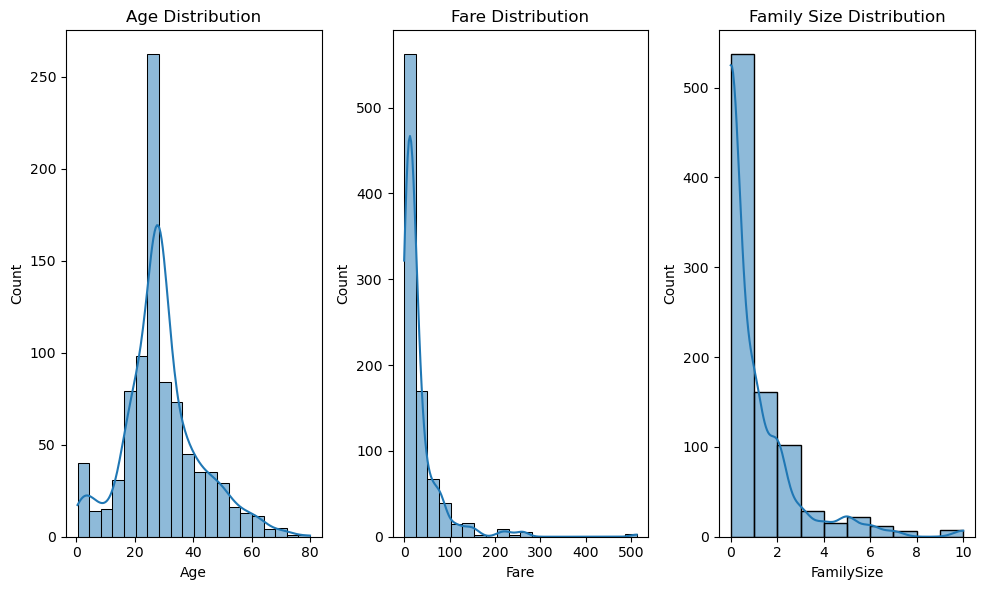

In [1274]:
plt.figure(figsize=(10, 6))

# age distribution
plt.subplot(1, 3, 1)
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')

# fare distribution
plt.subplot(1, 3, 2)
sns.histplot(data['Fare'], bins=20, kde=True)
plt.title('Fare Distribution')

# family size distribution
plt.subplot(1, 3, 3)
sns.histplot(data['FamilySize'], bins=10, kde=True)
plt.title('Family Size Distribution')

plt.tight_layout()
plt.show()

Histograms for Age, Fare and Family Size (testing set)

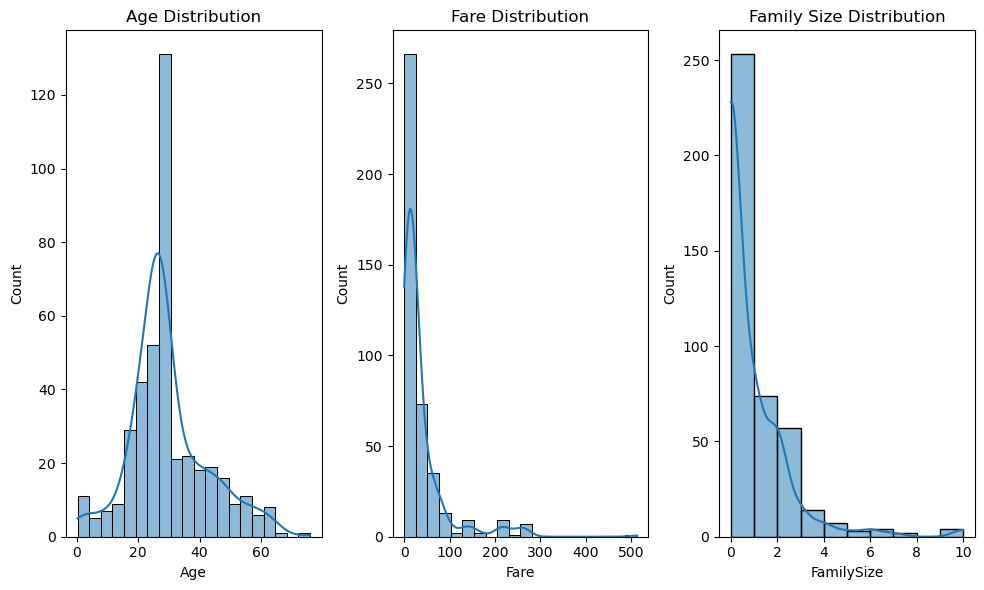

In [1276]:
plt.figure(figsize=(10, 6))

# age distribution
plt.subplot(1, 3, 1)
sns.histplot(test['Age'], bins=20, kde=True)
plt.title('Age Distribution')

# fare distribution
plt.subplot(1, 3, 2)
sns.histplot(test['Fare'], bins=20, kde=True)
plt.title('Fare Distribution')

# family size distribution
plt.subplot(1, 3, 3)
sns.histplot(test['FamilySize'], bins=10, kde=True)
plt.title('Family Size Distribution')

plt.tight_layout()
plt.show()

### <a id='observations'></a>🔍 Initial Survival Analysis 

Survival rate by gender

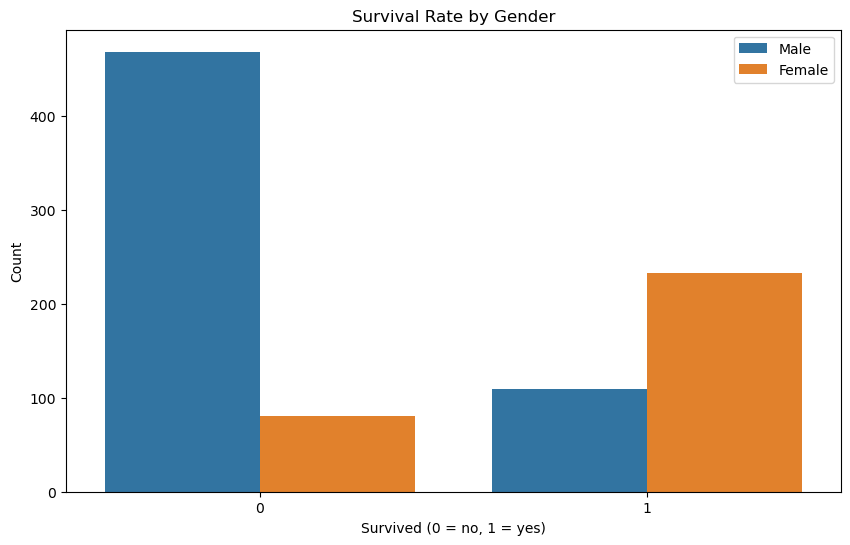

In [1279]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title("Survival Rate by Gender")
plt.xlabel("Survived (0 = no, 1 = yes)")
plt.ylabel("Count")
plt.legend(['Male', 'Female'])
plt.show()

Survival rate by gender (testing set)

Survival rate by passenger class

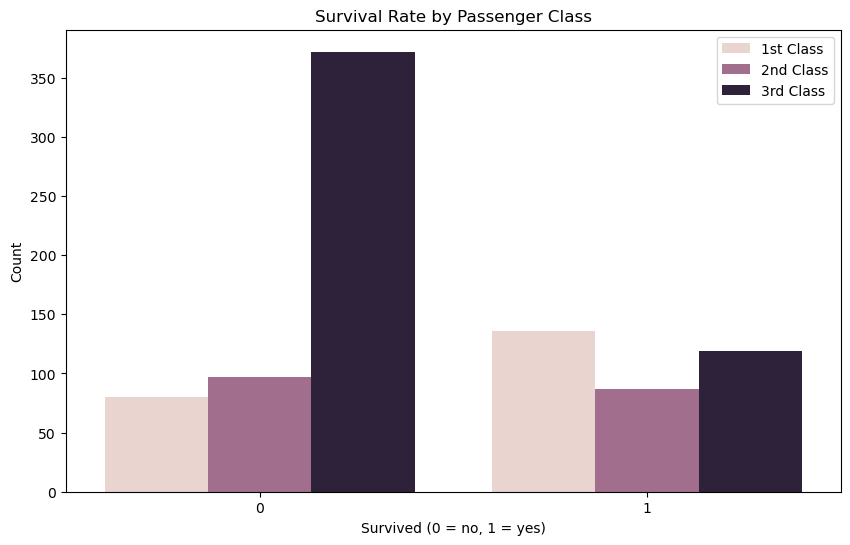

In [1282]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Survived (0 = no, 1 = yes)")
plt.ylabel("Count")
plt.legend(["1st Class", "2nd Class", "3rd Class"])
plt.show()

### <a id='corrVar'></a>🔍 Correlation Between Features

In [1284]:
print(data.dtypes)

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
Embarked        int64
FamilySize      int64
dtype: object


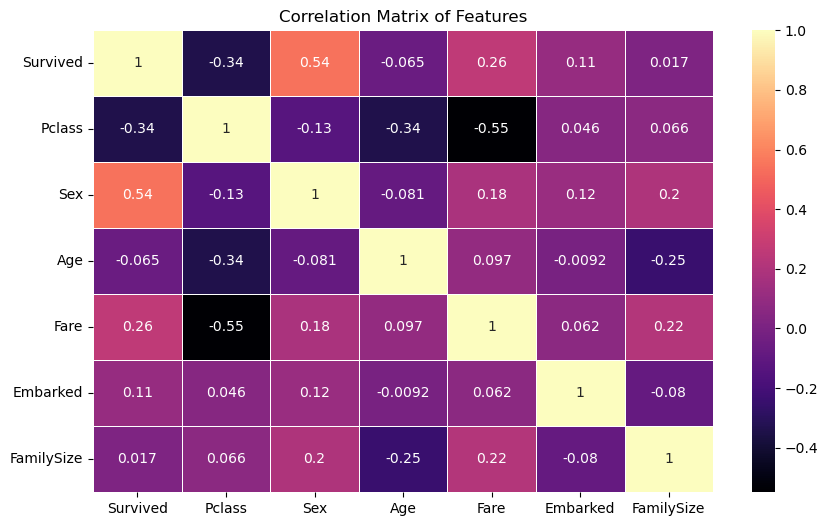

In [1285]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='magma', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

## <a id='summaryAnalysis'></a>🔍 Summary
1. **Basic Data Distribution**:
   - Age: Shows the distribution of ages among passengers.
   - Fare: Displays the ticket price range, indicating the economic diversity of passengers.
   - Family Size: Highlights the family structures on board.

2. **Survival Analysis**:
   - Gender: Females had a higher survival rate compared to males.
   - Passenger Class: 1st class passengers had a better chance of survival compared to lower classes.

3. **Correlation Analysis**:
   - The heatmap shows correlations between features, revealing possible relationships.
   - Features like 'Pclass' and 'Fare' may have a noticeable influence on survival rates.
---

## <a id='visualizations'></a>📈 Visualizations 
[🔝 Main menu](#top)

### <a id='rateAgeGender'></a>📈 Survival Rate by Age and Gender

<function matplotlib.pyplot.show(close=None, block=None)>

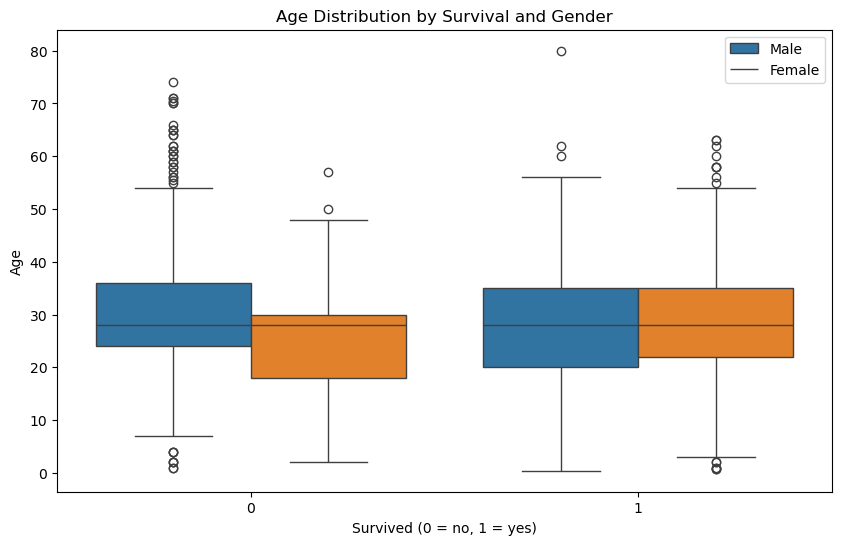

In [1289]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', hue='Sex', data=data)
plt.title("Age Distribution by Survival and Gender")
plt.xlabel("Survived (0 = no, 1 = yes)")
plt.ylabel("Age")
plt.legend(["Male", "Female"])
plt.show

### <a id='rateFam'></a> 📈 Survival Rate by Family Size

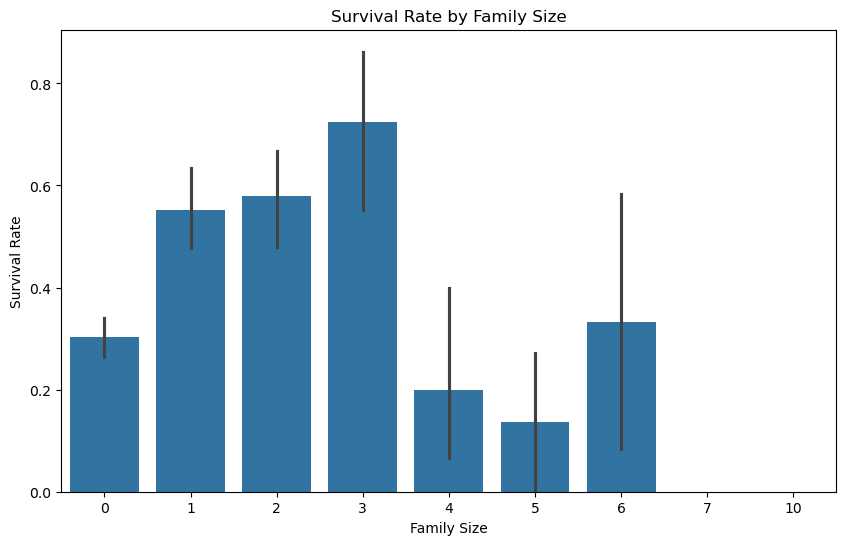

In [1291]:
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=data)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()

### <a id='fareDist'></a>📈 Fare Distributions by Class and Survival

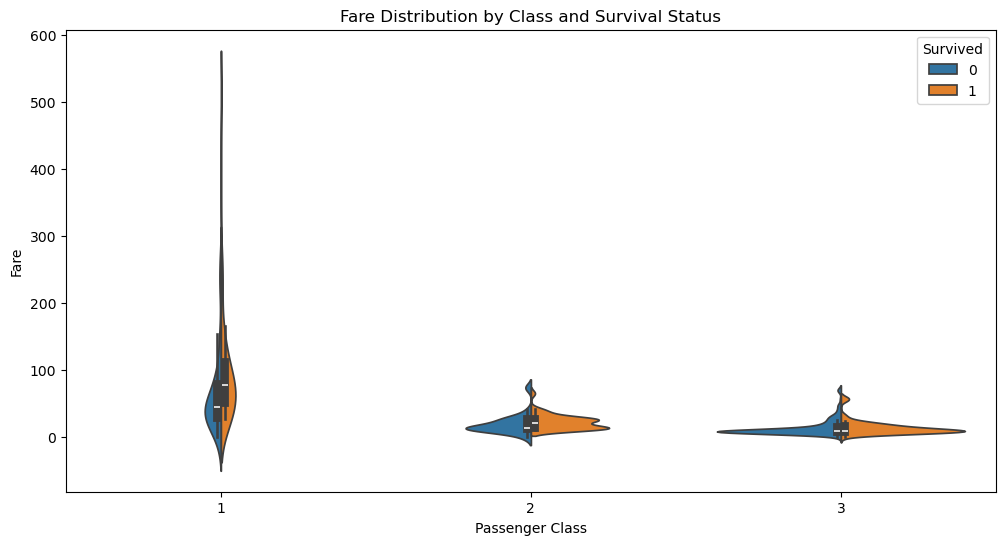

In [1293]:
# Fare Distribution by Class and Survival
plt.figure(figsize=(12, 6))
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=data, split=True)
plt.title('Fare Distribution by Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
# plt.legend(["Didn't survive", "Survived"])
plt.show()


---

## <a id='machine'></a>🤖 Machine Learning Model - Logistic Regression
[🔝 Main menu](#top)

### <a id='dataPre'></a>🤖 Data Preparation

In [1297]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data.drop('Survived', axis=1) #everything except target
y = data['Survived'] #what we need to predict

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (712, 6)
Testing data shape: (179, 6)


### <a id='modSel'></a> 🤖 Model Selection

In [1299]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

### <a id='modTrain'></a>🤖 Make Predictions

For training set:

In [1302]:
y_pred = model.predict(X_test)

### <a id='eval'></a>🤖 Evaluate the Model

In [1304]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion matrix:")
print(conf_matrix)

report = classification_report(y_test, y_pred)
print("\nClassification report:")
print(report)

Accuracy score: 0.81

Confusion matrix:
[[91 14]
 [20 54]]

Classification report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### 🤖 Summary



## <a id='submission'></a> 📤 Generate Submission
[🔝 Main menu](#top)

Using the trained Logistic Regression model, we’ll predict survival for the passengers in the test dataset and create a CSV file for submission to Kaggle.

In [1307]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,0,34.5,7.8292,2,0
1,3,1,47.0,7.0000,0,1
2,2,0,62.0,9.6875,2,0
3,3,0,27.0,8.6625,0,0
4,3,1,22.0,12.2875,0,2


In [1308]:
test_features = test[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]

predictions = model.predict(test_features)

submission_test = pd.read_csv('/Users/jimenapastranajessel/Documents/personal/portfolio/titanicKaggle/test.csv')
submission_df = pd.DataFrame({
    "PassengerId": submission_test["PassengerId"],
    "Survived": predictions
})

submission_file_path = "titanic_submission_jimenaPastrana.csv"
submission_df.to_csv(submission_file_path, index=False)
print(f"Submission filed saved as {submission_file_path}")

Submission filed saved as titanic_submission_jimenaPastrana.csv
